# 652 Week 3 Tips and Tricks #

Revision: [ W2022 20 January 2022 ]

## Before starting your assignments... ##

... make a clean copy of your notebook in case you have to start over.

In Coursera:

`File > Make a copy...`

## Have a look at the ndlib tutorial ##

https://ndlib.readthedocs.io/en/latest/tutorial.html

## Load some libraries to get started... ##

In [20]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from networkx.drawing.nx_pydot import graphviz_layout
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep
import operator
import random

In [21]:
import json
# %matplotlib inline

### Make a graph to use for examples (from 652 W1 tutorial) ###

In [24]:
# dir(ep)

In [25]:
# Network Definition
G = nx.erdos_renyi_graph(1000, 0.1)

In [5]:
# Model Selection
model = ep.SIRModel(G)

In [6]:
# Model Configuration
config = mc.Configuration()
config.add_model_parameter('beta', 0.001)
config.add_model_parameter('gamma', 0.01)
config.add_model_parameter("fraction_infected", 0.05)
model.set_initial_status(config)

In [7]:
# Simulation
iterations = model.iteration_bunch(200)
trends = model.build_trends(iterations)

100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:04<00:00, 42.83it/s]


In [28]:
iterations[30]['status_delta']

{0: -17, 1: 14, 2: 3}

In [29]:
node_counts = [it['node_count'][1] for it in iterations]

In [30]:
# Number of infected nodes every 10 iterations
for i in range(0, 200, 10):
    print('Iteration', i, node_counts[i])

Iteration 0 50
Iteration 10 126
Iteration 20 251
Iteration 30 413
Iteration 40 544
Iteration 50 657
Iteration 60 680
Iteration 70 657
Iteration 80 611
Iteration 90 561
Iteration 100 519
Iteration 110 471
Iteration 120 424
Iteration 130 370
Iteration 140 323
Iteration 150 286
Iteration 160 255
Iteration 170 229
Iteration 180 207
Iteration 190 184


## Use a dictionary to keep track of results ##

You'll be calling your `simulate_threshold()` function often, with the same set of importance mesures. 

I found it convenient to keep track of the metrics in a dictionary at the beginning of the notebook, and then loop through the dictionary when calling the `simulate_threshold()` function

*Creating bits of reusable code for tasks that you expect to run multiple times is good practice in general, not just for SIADS 652 assignments*

### Put the metrics dictionary at the top of your notebook ###

In [31]:
# include this once at the top of your notebook 
metrics = {'random'     :None, 
           'degree'     :nx.degree_centrality, 
           'closeness'  :nx.closeness_centrality, 
           'betweenness':nx.betweenness_centrality, 
           'pagerank'   :nx.pagerank}
metrics

{'random': None,
 'degree': <function networkx.algorithms.centrality.degree_alg.degree_centrality(G)>,
 'closeness': <function networkx.algorithms.centrality.closeness.closeness_centrality(G, u=None, distance=None, wf_improved=True)>,
 'betweenness': <function networkx.algorithms.centrality.betweenness.betweenness_centrality(G, k=None, normalized=True, weight=None, endpoints=False, seed=None)>,
 'pagerank': <function networkx.algorithms.link_analysis.pagerank_alg.pagerank(G, alpha=0.85, personalization=None, max_iter=100, tol=1e-06, nstart=None, weight='weight', dangling=None)>}

### Loop through the metrics dictionary instead of calling functions ###

You can supress the progress bars with the `%%capture` cell magic

In [35]:
# load a sample dictionary
d_file = 'sample_d.json'
with open(d_file, 'r') as f:
    sample_d = json.load(f)

# sample_d

In [36]:
# %%capture
# you can supress the progress bars with the %%capture cell magic

# loo
I=50
N=5
T=0.3
random.seed(42)
results_dictionary ={}
for metric, function in metrics.items():
    
#     # you have to complete the simulate_threshold function in your assignment3, 
#     # so we can't run it here.
#     results_dictionary[metric] = simulate_threshold(G, function, iterate=I, n=N, threshold=T)

    # for now, just load some sample data
    results_dictionary[metric] = sample_d[metric]
print(results_dictionary)

{'random': [5, 12, 16, 19, 22, 25, 27, 29, 30, 31, 32, 33, 34, 35, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36], 'degree': [5, 46, 80, 111, 137, 158, 177, 192, 206, 219, 230, 241, 251, 261, 269, 274, 278, 281, 283, 285, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 298, 298, 298, 298, 298, 298, 298, 298, 298, 298, 298, 298, 298, 298, 298, 298, 298, 298], 'closeness': [5, 17, 26, 29, 33, 39, 47, 54, 62, 70, 80, 88, 94, 98, 102, 105, 108, 110, 112, 115, 117, 119, 121, 123, 125, 127, 129, 132, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135], 'betweenness': [5, 30, 49, 67, 79, 91, 100, 108, 115, 121, 126, 131, 135, 139, 142, 144, 146, 148, 150, 152, 154, 155, 157, 159, 161, 163, 165, 167, 169, 170, 170, 170, 170, 170, 170, 170, 170, 170, 170, 170, 170, 170, 170, 170, 170, 170, 170, 170, 170, 170], 'pagerank': [5, 47, 

## Plotting ##

You'll have to generate lots of plots.  It may be convenient to define a plotting function at the beginning of your notebook and call it repeatedly.

*Creating bits of reusable code for tasks that you expect to run multiple times is good practice in general, not just for SIADS 652 assignments*

In [14]:
def generate_infection_plot(
                  d, 
                  plot_title   = 'Seed node selection comparison',
                  x_label      = 'Iteration →',
                  y_label      = '↑ Infected nodes', 
                  legend_title = 'Seed node selection', 
                  legend_loc   = 1, # look at the matplotlib docs for different locations
                  normalize    = False):

    fig, ax = plt.subplots(figsize=(16,9))
    fig.suptitle(plot_title, 
                 fontsize=16, 
                 weight='bold', 
                 ha='left',
                 x=0.1,
                )
    
    if normalize==False:
        for k,v in d.items():
            ax.plot(v, label=k)
            
    if normalize==True:
        norm_d = {k:[val/max(vals) for val in vals] for k,vals in d.items()}
        for k,v in norm_d.items():
            ax.plot(v, label=k)

    ax.set_xlabel(x_label, 
                  fontsize=14, 
                  x=0, 
                  ha='left',
                 )
    ax.set_ylabel(y_label, 
                  rotation=0, 
                  fontsize=14, 
                  y=1.01, 
                  ha='left',
                 )
    ax.legend(title=legend_title,
              title_fontsize=14,
              fontsize=12, 
              loc=legend_loc,
             )._legend_box.align = "left"

#     ax.spines['right'].set_visible(True)
#     ax.spines['top'  ].set_visible(True)

    return plt 

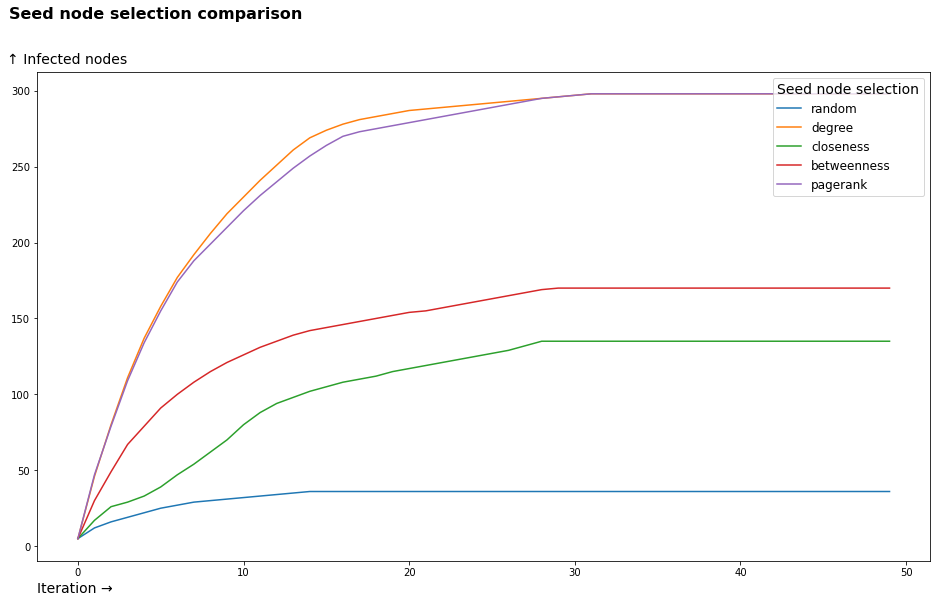

In [37]:
# try out the plot with our sample data
results_dictionary = sample_d
# unnormalized data
generate_infection_plot(results_dictionary, normalize=False);

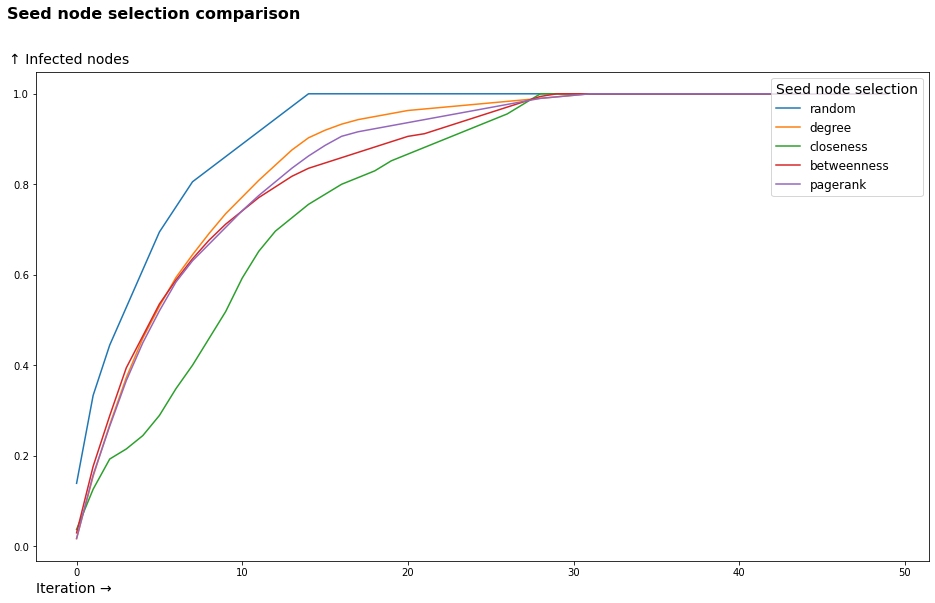

In [38]:
# try out the plot with our sample data
results_dictionary = sample_d
# normalized data
generate_infection_plot(results_dictionary, normalize=True);

## Finding the convergence point ##

To compare different rates of convergence, it is useful to define the convergence point.

*The convergence point is where the infected nodes (either absolute number or proportion) stops changing.*
 

#### `find_convergence_point(proportion_infected):` ####

In [17]:
def find_convergence_point(proportion_infected): # proportion_infected is a list
    convergence_point=0
    for i,v in enumerate(proportion_infected):
        if proportion_infected[i] > proportion_infected[convergence_point]:
#             print(proportion_infected[i], proportion_infected[convergence_point])
            convergence_point = i

    return convergence_point    

In [39]:
find_convergence_point(sample_d['random'])

14

In [40]:
find_convergence_point(sample_d['degree'])

31

## Good luck with Assignment 3 ! ##